In [230]:
from matplotlib import pyplot as plt
import numpy as np
from random import choice
import time
from IPython.display import clear_output
from time import sleep 
import math
import pandas as pd
%matplotlib inline

## Build Table Function
def build_table(route):
    route = [
        tuple(x) for x in route
    ]  # converts list into immutable list like [(1,3),(1,2)]
    route = route[::-1]  # reverses the list to go the route backwards
    vals = [(route[0], 1)]  # adds target position to list
    multipliedrewards_list = dict.fromkeys(route)
    route.pop(0)  # deletes target position from ttlist otherwise it would be a duplicate
    q = 1
    reward = 0.9
    # create list with positions + rewarded values
    for x in route:
        vals.append([x, math.pow(reward, q)])
        q += 1

    # creates table with final reward values
    # add value to table if not exist, otherwise multiply with existing value
    pd.options.display.float_format = "{:,.5g}".format
    df = pd.DataFrame(columns=[0, 1, 2, 3], index=[0, 1, 2, 3])
    for x in vals:
        mrl_temp = multipliedrewards_list.get(x[0])
        if not mrl_temp:
            multipliedrewards_list[x[0]] = x[1]
        else:
            multipliedrewards_list[x[0]] = x[1] * mrl_temp
    for x in multipliedrewards_list:
        df.at[x[0], x[1]] = multipliedrewards_list.get(x)

    return multipliedrewards_list, df.transpose(copy=True)  # swap axis so they match the meshgrid with x and y values

## Get adjacent reward values  next to current position
nn = [-1, 1]
def get_next_field_vals(df,xpos, ypos) -> np.ndarray:
    nghb_values = []
    for n in nn:
        newposx = xpos + n  # xpos = startposition[0]
        if newposx >= 0 and newposx <= 3:
            nghb_values.append(df[xpos + n][ypos])
        newposy = ypos + n
        if newposy >= 0 and newposy <= 3:
            nghb_values.append(df[xpos][ypos + n])
    #print(f"Neighbour values: {nghb_values}")
    u = np.unique(nghb_values)
    u = u[np.isfinite(u)]
    return u

## Get the max value in a list
def max_in_list(llist,max_value):
    #print(f"Max: {max_value}")
    for key, value in llist.items():
        if value == max_value:
            # print("field of max value:")
            # print(f"Value: {value}")
            return key[0], key[1]

In [202]:
l = [np.nan,np.nan]
u = np.unique(l)
u = u[np.isfinite(u)]
print(len(u))


[nan]
0


## Get start and target position

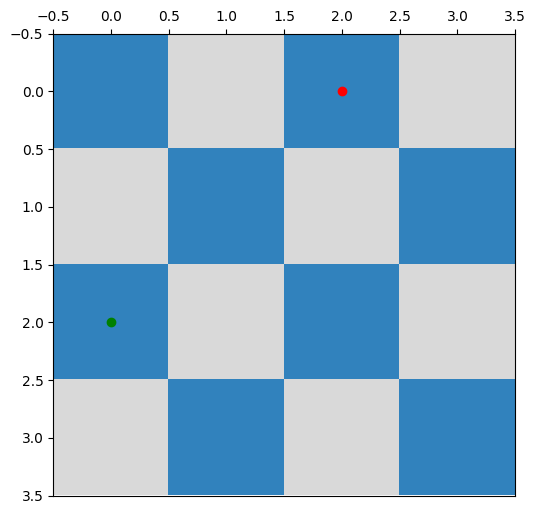

In [260]:
GRID_SIZE = 4 #@param {type:"slider", min:4, max:16, step:1}
x = range(GRID_SIZE)
y = range(GRID_SIZE)
h, v = np.meshgrid(x, y)  # rect grid with vector coordinates (X,Y)
# min_max = np.min(x), np.max(x), np.min(y), np.max(y)
res = np.add.outer(range(4), range(4)) % 2  # returns product of two vectors
positions = np.vstack([h.ravel(), v.ravel()]).T

while True:
    start_position = choice(positions)
    target_position = choice(positions)
    dist = np.subtract(target_position,start_position)
    not_allowed = [[-1,0],[1,0],[0,1],[0,-1],[0,0]]
    #print(start_position, target_position, dist)
    if (np.not_equal(dist,not_allowed)).all():
        break

#start_position, target_position = get_start_positions()
plt.ion()
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()
possible_moves = [-1, 0, 1]
ax.invert_yaxis()
ax.xaxis.tick_top()
#ax.cla()

def draw_board(xpos,ypos,color):
    ax = plt.gca()
    ax.scatter(xpos, ypos, color=color)
    fig.canvas.draw_idle()
    fig.canvas.flush_events()
    plt.imshow(res, cmap="tab20c")

    #target_dot = ax.scatter(target_position[0], target_position[1], color="g")
    #return ax


if not np.array_equal(start_position, target_position):
    draw_board(start_position[0],start_position[1],color="r")
    draw_board(target_position[0],target_position[1],color="g")

## Explore

Target reached.


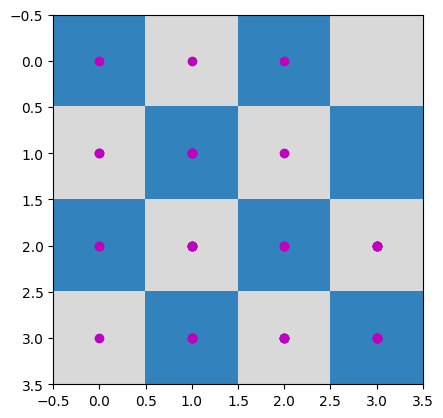

Total Steps: 38
Route: [(3, 0), (2, 0), (2, 1), (2, 2), (2, 3), (1, 3), (2, 3), (2, 2), (3, 2), (3, 3), (3, 2), (3, 3), (3, 2), (3, 3), (3, 2), (3, 3), (3, 2), (3, 3), (2, 3), (1, 3), (1, 2), (1, 1), (1, 0), (1, 1), (1, 2), (1, 1), (1, 2), (1, 1), (0, 1), (0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (1, 3), (1, 2), (0, 2), (0, 3)]


,0,1,2,3
0,0.38742,0.1853,0.020276,0.018248
1,0.15009,0.0027389,0.022528,NaN
2,0.43047,0.0041746,0.000955,1.126e-06
3,1,0.001797,7.6177e-05,1.9068e-06


In [258]:
route = []

route.append((start_position[0], start_position[1]))
newposx, newposy = 0, 0
# testlist = [[0, 0], [1, 0], [0, 0], [1, 0], [1, 1], [1, 2], [0, 2], [0, 1], [0, 2], [0, 1], [0, 2], [0, 1], [1, 1], [2, 1], [2, 0]]
SLEEP = 0 #@param{type: 'number'}

plt.ion()
def move(mode="explore", route=route, sleep_time=SLEEP):
    stepcounter = 0
    while True:
    
        #clear_output(True)
        sleep(sleep_time)
        last_pos = route[-1]
        movex = choice(possible_moves)
        movey = choice(possible_moves)
        if not movex == movey:
            if movex == 0 or movey == 0:
                newposx = last_pos[0] + movex
                newposy = last_pos[1] + movey
                ax = plt.gca()
                #ax.cla()
                if newposx >= 0 and newposx <= 3 and newposy >= 0 and newposy <= 3:
                    # print(f"New pos: {newposx, newposy}")
                    route.append((newposx, newposy))
                    draw_board(newposx, newposy, color="m")
                    #ax.scatter(newposx, newposy, color="m")
                    #plt.show()
                    stepcounter += 1
                if newposx == target_position[0] and newposy == target_position[1]:
                    print("Target reached.")
                    plt.show()
                    break

    return route, stepcounter

route, stepcounter = move("explore", route=route)
print(f"Total Steps: {stepcounter}")
print(f"Route: {route}", sep="\n")

rewardslist, df = build_table(route)
df

In [ ]:
## Print out rewards for each position
for key, value in rewardslist.items():
    print(key, value)

## Exploit
Er soll alle felder drumherum checken und dann den nächst höheren nehmen 
danach: wenn die felder einen bestimmten Treshhold nicht überschreiten, nimm random.


[(2, 0)]


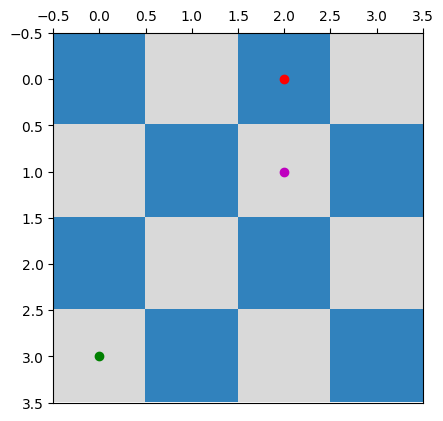

[(2, 0), (2, 1)]


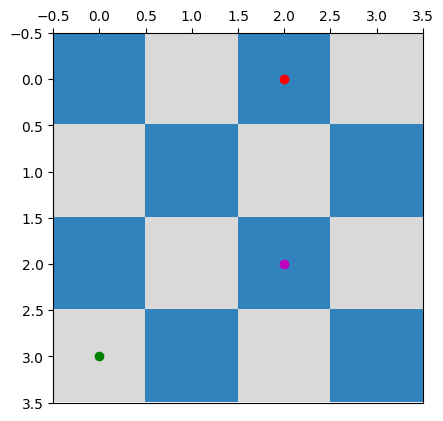

[(2, 0), (2, 1), (2, 2)]


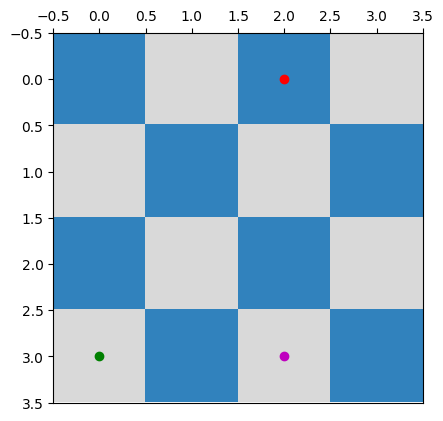

[(2, 0), (2, 1), (2, 2), (2, 3)]


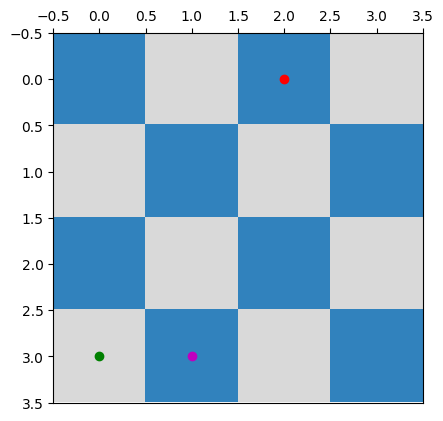

[(2, 0), (2, 1), (2, 2), (2, 3), (1, 3)]
Target reached!


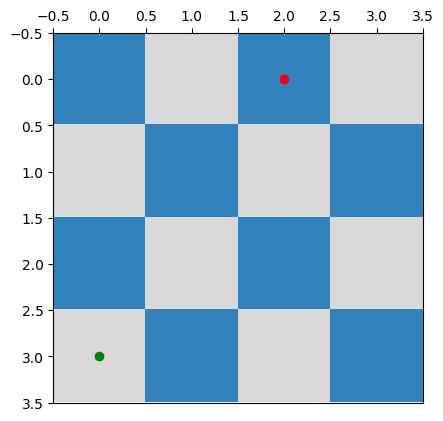

Total Steps: 4
Route: [(2, 0), (2, 1), (2, 2), (2, 3), (1, 3)]


In [239]:
## allows to go back to old fields
route = []
stepcounter = 0
SLEEP = 1  #@param{type: 'number'}
route.append((start_position[0], start_position[1]))

while True:
    #clear_output(True)
    print(route)
    last_pos = route[-1]
    next_field_vals = get_next_field_vals(df,last_pos[0],last_pos[1])
    #print(f"nextfields: {next_field_vals}")
    newpos =  max_in_list(rewardslist,next_field_vals[-1])# best next field with highest value
    ax = plt.gca()
    draw_board()
    sleep(SLEEP)
    if newpos[0] == target_position[0] and newpos[1] == target_position[1]:
        print("Target reached!")
        plt.show()
        break
    if newpos in route:
        if next_field_vals.size != 1:
            newpos =  max_in_list(rewardslist,next_field_vals[-2])# best next field with highest value
    route.append((newpos[0], newpos[1]))
    ax.scatter(newpos[0], newpos[1], color="m")
    #plt.show()
    fig.canvas.draw_idle()
    stepcounter += 1

print(f"Total Steps: {stepcounter}")
print(f"Route: {route}", sep="\n")  

## Exploit 2.o

KeyboardInterrupt: 

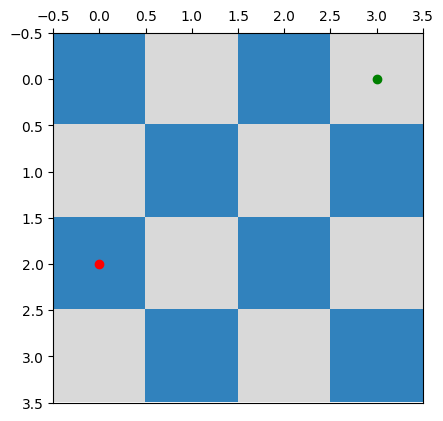

In [213]:
route = []
stepcounter = 0
SLEEP = 5 
route.append((start_position[0], start_position[1]))

while True:
    clear_output(True)
    sleep(SLEEP)
    ax = draw_board()
    print(route)
    last_pos = route[-1]
    next_field_vals = get_next_field_vals(df,last_pos[0],last_pos[1])
    print(f"nextfields: {next_field_vals}")
    newpos =  max_in_list(rewardslist,next_field_vals[-1])# best next field with highest value

    if newpos[0] == target_position[0] and newpos[1] == target_position[1]:
        print("Target reached!")
        plt.show()
        break
    if newpos in route and len(next_field_vals) > 1:
        newpos =  max_in_list(rewardslist,next_field_vals[-2])# best next field with highest value
        stepcounter += 1
        route.append((newpos[0], newpos[1]))
        ax.scatter(newpos[0], newpos[1], color="m")
        plt.show()
    # else:
    #     movex = choice(possible_moves)
    #     movey = choice(possible_moves)
    #     if not movex == movey:
    #         if movex == 0 or movey == 0:
    #             newposx = last_pos[0] + movex
    #             newposy = last_pos[1] + movey
    #             ax = plt.gca()
    #             if newposx >= 0 and newposx <= 3 and newposy >= 0 and newposy <= 3:
    #                 # print(f"New pos: {newposx, newposy}")
    #                 route.append((newposx, newposy))
    #                 ax.scatter(newposx, newposy, color="m")
    #                 plt.show()
    #                 stepcounter += 1
    

print(f"Total Steps: {stepcounter}")
print(f"Route: {route}", sep="\n")  

